## data exploration and inspection

In [12]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Setup paths
PROJECT_ROOT = Path().resolve().parent if Path().cwd().name == 'notebooks' else Path().resolve()
print(f"Project root: {PROJECT_ROOT}")

# Add src to path for imports
sys.path.insert(0, str(PROJECT_ROOT / "src"))
from utils.data_loader import load_emb_data, split_dataset
from utils.preprocess import StructuredPreprocessor

# Data paths
DATA_DIR = PROJECT_ROOT / "data"
METADATA_PATH = DATA_DIR / "merged_dataset.csv"
IMAGE_DIR = DATA_DIR / "images"

print(f"Metadata: {METADATA_PATH.exists()}")
print(f"Image dir: {IMAGE_DIR.exists()}")

Project root: E:\Melanoma-Dermoscopic-Prognosis
Metadata: True
Image dir: True


In [16]:
# Load metadata
df = pd.read_csv(METADATA_PATH)

# Encode 'category' column (BEN=0, MEL=1)
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

# Display encoding result
print(df[['category', 'category_encoded']].head())

# Optional: Save encoded dataset
df.to_csv(DATA_DIR / 'encoded_dataset.csv', index=False)


  category  category_encoded
0      MEL                 1
1      BEN                 0
2      BEN                 0
3      BEN                 0
4      BEN                 0


In [4]:
# ============================================================================
# SECTION 1: RAW DATA EXPLORATION
# ============================================================================

print("="*80)
print("SECTION 1: RAW CSV DATA EXPLORATION")
print("="*80)

# Load raw CSV
df_raw = pd.read_csv(METADATA_PATH)
print(f"\n📊 Dataset Shape: {df_raw.shape}")
print(f"   Rows: {df_raw.shape[0]:,}")
print(f"   Columns: {df_raw.shape[1]}")

# Column overview
print(f"\n📋 Columns:")
for col in df_raw.columns:
    dtype = df_raw[col].dtype
    non_null = df_raw[col].notna().sum()
    null_count = df_raw[col].isna().sum()
    unique = df_raw[col].nunique()
    print(f"   {col:20s} | dtype: {str(dtype):15s} | Non-null: {non_null:6,} ({null_count:5,} null) | Unique: {unique:6,}")

# Display first few rows
print(f"\n📄 First 10 rows:")
display(df_raw.head(10))

# Display last few rows
print(f"\n📄 Last 10 rows:")
display(df_raw.tail(10))

SECTION 1: RAW CSV DATA EXPLORATION

📊 Dataset Shape: (9165, 7)
   Rows: 9,165
   Columns: 7

📋 Columns:
   image                | dtype: object          | Non-null:  9,165 (    0 null) | Unique:  9,165
   thickness            | dtype: float64         | Non-null:  9,165 (    0 null) | Unique:     69
   type                 | dtype: object          | Non-null:  9,165 (    0 null) | Unique:      4
   stage_ajcc           | dtype: int64           | Non-null:  9,165 (    0 null) | Unique:      5
   category             | dtype: object          | Non-null:  9,165 (    0 null) | Unique:      2
   label                | dtype: int64           | Non-null:  9,165 (    0 null) | Unique:      2
   source               | dtype: object          | Non-null:  9,165 (    0 null) | Unique:      2

📄 First 10 rows:


,image,thickness,type,stage_ajcc,category,label,source
0,ISIC_2957465,0.0,dermoscopic,0,MEL,6,ISIC
1,ISIC_0030605,0.0,dermoscopic,0,BEN,0,ISIC
2,ISIC_0033884,0.0,dermoscopic,0,BEN,0,ISIC
3,ISIC_0033853,0.0,dermoscopic,0,BEN,0,ISIC
4,ISIC_0027587,0.0,dermoscopic,0,BEN,0,ISIC
5,ISIC_7545432,0.2,dermoscopic,1,MEL,6,ISIC
6,ISIC_0032263,0.0,dermoscopic,0,BEN,0,ISIC
7,ISIC_0031735,0.0,dermoscopic,0,BEN,0,ISIC
8,ISIC_0025088,0.0,dermoscopic,0,BEN,0,ISIC
9,ISIC_0028883,0.0,dermoscopic,0,BEN,0,ISIC



📄 Last 10 rows:


,image,thickness,type,stage_ajcc,category,label,source
9155,ISIC_0024514,0.0,dermoscopic,0,BEN,0,ISIC
9156,ISIC_0027624,0.0,dermoscopic,0,BEN,0,ISIC
9157,ISIC_0025023,0.0,dermoscopic,0,BEN,0,ISIC
9158,ISIC_0202119,0.4,dermoscopic,1,MEL,6,ISIC
9159,ISIC_0028461,0.0,dermoscopic,0,BEN,0,ISIC
9160,ISIC_0031338,0.0,dermoscopic,0,BEN,0,ISIC
9161,ISIC_0025590,0.0,dermoscopic,0,BEN,0,ISIC
9162,ISIC_0029946,0.0,dermoscopic,0,BEN,0,ISIC
9163,ISIC_8708918,0.0,dermoscopic,0,MEL,6,ISIC
9164,ISIC_0032944,0.0,dermoscopic,0,BEN,0,ISIC



SECTION 2: DETAILED COLUMN ANALYSIS

1️⃣ IMAGE COLUMN
   Found image column: 'image'
   Unique images: 9,165
   Duplicates: 0

2️⃣ THICKNESS COLUMN
   Found thickness column: 'thickness'
   Non-null values: 9,165
   Null values: 0
   Min: 0.00 mm
   Max: 7.30 mm
   Mean: 0.05 mm
   Median: 0.00 mm

   Distribution:
count    9165.000000
mean        0.050392
std         0.352074
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.300000
Name: thickness, dtype: float64

   ⚠️  Zero thickness (in-situ): 8,666 (94.6%)


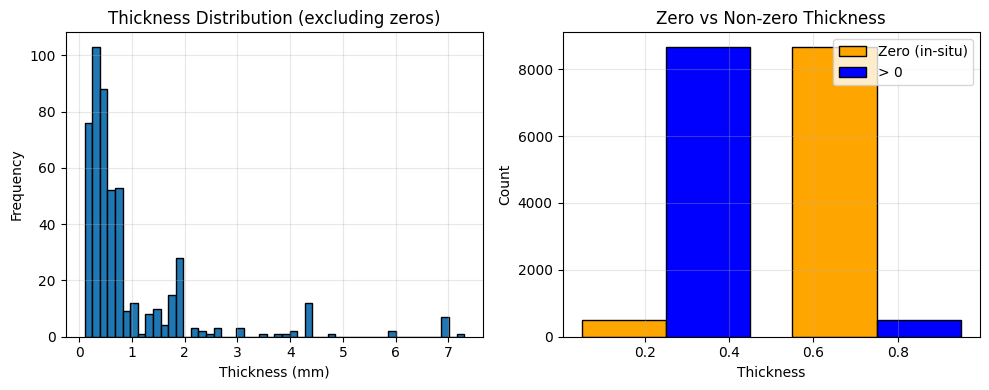


3️⃣ TYPE COLUMN
   Found type column: 'type'

   Value counts:
      dermoscopic: 9,078 (99.1%)
      clinical: overview: 39 (0.4%)
      clinical: 36 (0.4%)
      clinical: close-up: 12 (0.1%)


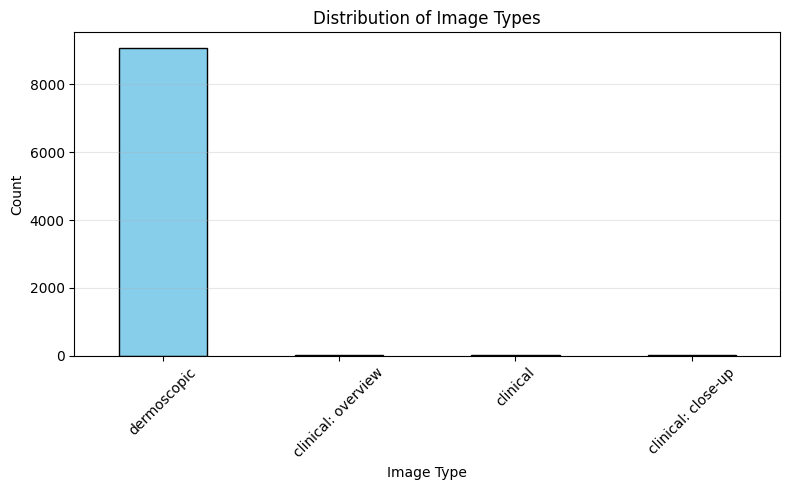


4️⃣ STAGE AJCC COLUMN
   Found stage column: 'stage_ajcc'
   Data type: int64
   Unique values: 5

   Value counts:
      0: 8,666
      1: 386
      2: 73
      4: 23
      3: 17

   ✓ Can convert 9,165 values to numeric
   Numeric range: 0 to 4


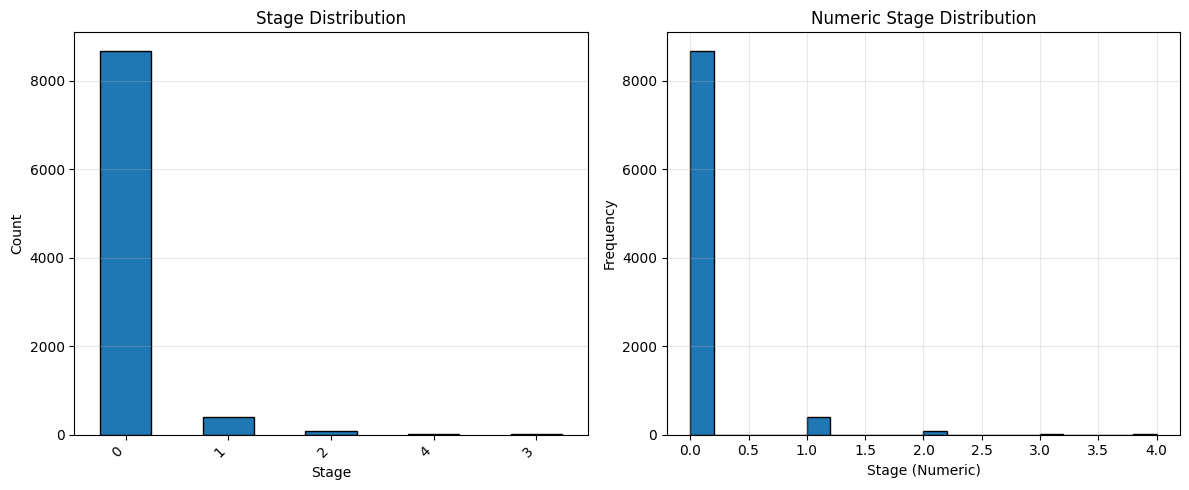


5️⃣ CATEGORY COLUMN
   Found category column: 'category'

   Value counts:
      BEN: 8,061 (88.0%)
      MEL: 1,104 (12.0%)


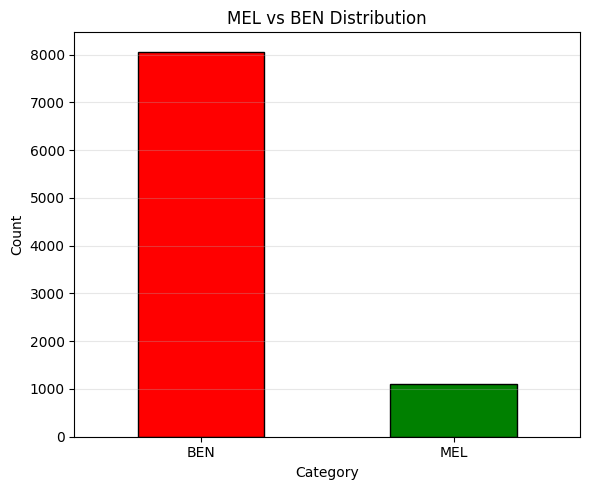


6️⃣ LABEL COLUMN
   Label column found: 'label'
   Data type: int64
   Unique values: 2

   Value counts:
      0: 8,061 (88.0%)
      6: 1,104 (12.0%)

   ✓ Binary labels: [0, 6]

7️⃣ SOURCE COLUMN
   Source column found: 'source'

   Value counts:
      ISIC: 8,968 (97.9%)
      Atlas: 197 (2.1%)


In [5]:
# ============================================================================
# SECTION 2: COLUMN-SPECIFIC ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION 2: DETAILED COLUMN ANALYSIS")
print("="*80)

# 1. Image column
print("\n1️⃣ IMAGE COLUMN")
image_col = None
for col in ["image", "image_id", "image_name", "filename", "file"]:
    if col in df_raw.columns:
        image_col = col
        break

if image_col:
    print(f"   Found image column: '{image_col}'")
    print(f"   Unique images: {df_raw[image_col].nunique():,}")
    print(f"   Duplicates: {df_raw[image_col].duplicated().sum()}")
    if df_raw[image_col].duplicated().sum() > 0:
        print(f"   ⚠️  WARNING: Duplicate image IDs found!")
        display(df_raw[df_raw[image_col].duplicated()])
else:
    print("   ❌ No image column found!")

# 2. Thickness column
print("\n2️⃣ THICKNESS COLUMN")
thickness_col = None
for col in ["thickness", "breslow_thickness"]:
    if col in df_raw.columns:
        thickness_col = col
        break

if thickness_col:
    print(f"   Found thickness column: '{thickness_col}'")
    thickness_series = pd.to_numeric(df_raw[thickness_col], errors='coerce')
    print(f"   Non-null values: {thickness_series.notna().sum():,}")
    print(f"   Null values: {thickness_series.isna().sum():,}")
    print(f"   Min: {thickness_series.min():.2f} mm")
    print(f"   Max: {thickness_series.max():.2f} mm")
    print(f"   Mean: {thickness_series.mean():.2f} mm")
    print(f"   Median: {thickness_series.median():.2f} mm")
    
    # Distribution
    print(f"\n   Distribution:")
    print(thickness_series.describe())
    
    # Zero thickness (in-situ lesions)
    zero_count = (thickness_series == 0).sum()
    print(f"\n   ⚠️  Zero thickness (in-situ): {zero_count:,} ({100*zero_count/len(df_raw):.1f}%)")
    
    # Histogram
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    thickness_series[thickness_series > 0].hist(bins=50, edgecolor='black')
    plt.xlabel('Thickness (mm)')
    plt.ylabel('Frequency')
    plt.title('Thickness Distribution (excluding zeros)')
    plt.grid(alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.hist([thickness_series == 0, thickness_series > 0], 
             bins=[0, 0.5, 1], label=['Zero (in-situ)', '> 0'], 
             color=['orange', 'blue'], edgecolor='black')
    plt.xlabel('Thickness')
    plt.ylabel('Count')
    plt.title('Zero vs Non-zero Thickness')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("   ❌ No thickness column found!")

# 3. Type column
print("\n3️⃣ TYPE COLUMN")
type_col = None
for col in ["type", "image_type"]:
    if col in df_raw.columns:
        type_col = col
        break

if type_col:
    print(f"   Found type column: '{type_col}'")
    print(f"\n   Value counts:")
    type_counts = df_raw[type_col].value_counts()
    for val, count in type_counts.items():
        print(f"      {val}: {count:,} ({100*count/len(df_raw):.1f}%)")
    
    # Visualization
    plt.figure(figsize=(8, 5))
    type_counts.plot(kind='bar', color=['skyblue', 'coral'], edgecolor='black')
    plt.xlabel('Image Type')
    plt.ylabel('Count')
    plt.title('Distribution of Image Types')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("   ❌ No type column found!")

# 4. Stage AJCC column
print("\n4️⃣ STAGE AJCC COLUMN")
stage_col = None
for col in ["stage_ajcc", "ajcc_stage", "stage"]:
    if col in df_raw.columns:
        stage_col = col
        break

if stage_col:
    print(f"   Found stage column: '{stage_col}'")
    print(f"   Data type: {df_raw[stage_col].dtype}")
    print(f"   Unique values: {df_raw[stage_col].nunique()}")
    print(f"\n   Value counts:")
    stage_counts = df_raw[stage_col].value_counts().head(20)
    for val, count in stage_counts.items():
        print(f"      {val}: {count:,}")
    
    # Try numeric conversion
    stage_numeric = pd.to_numeric(df_raw[stage_col], errors='coerce')
    if stage_numeric.notna().sum() > 0:
        print(f"\n   ✓ Can convert {stage_numeric.notna().sum():,} values to numeric")
        print(f"   Numeric range: {stage_numeric.min()} to {stage_numeric.max()}")
    else:
        print(f"\n   ⚠️  Cannot convert to numeric (likely string stages like 'T1a', 'T1b')")
    
    # Visualization
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    stage_counts.plot(kind='bar', edgecolor='black')
    plt.xlabel('Stage')
    plt.ylabel('Count')
    plt.title('Stage Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.3, axis='y')
    
    if stage_numeric.notna().sum() > 0:
        plt.subplot(1, 2, 2)
        stage_numeric.hist(bins=20, edgecolor='black')
        plt.xlabel('Stage (Numeric)')
        plt.ylabel('Frequency')
        plt.title('Numeric Stage Distribution')
        plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("   ❌ No stage column found!")

# 5. Category column (MEL/BEN)
print("\n5️⃣ CATEGORY COLUMN")
if "category" in df_raw.columns or "cathegory" in df_raw.columns:
    cat_col = "category" if "category" in df_raw.columns else "cathegory"
    print(f"   Found category column: '{cat_col}'")
    print(f"\n   Value counts:")
    cat_counts = df_raw[cat_col].value_counts()
    for val, count in cat_counts.items():
        print(f"      {val}: {count:,} ({100*count/len(df_raw):.1f}%)")
    
    # Visualization
    plt.figure(figsize=(6, 5))
    cat_counts.plot(kind='bar', color=['red', 'green'], edgecolor='black')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('MEL vs BEN Distribution')
    plt.xticks(rotation=0)
    plt.grid(alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("   ⚠️  No category column found (may not be needed)")

# 6. Label column
print("\n6️⃣ LABEL COLUMN")
if "label" in df_raw.columns:
    print(f"   Label column found: 'label'")
    print(f"   Data type: {df_raw['label'].dtype}")
    print(f"   Unique values: {df_raw['label'].nunique()}")
    print(f"\n   Value counts:")
    label_counts = df_raw['label'].value_counts().sort_index()
    for val, count in label_counts.items():
        print(f"      {val}: {count:,} ({100*count/len(df_raw):.1f}%)")
    
    # Check if binary (0/1 or similar)
    unique_vals = sorted(df_raw['label'].unique())
    if len(unique_vals) == 2:
        print(f"\n   ✓ Binary labels: {unique_vals}")
    else:
        print(f"\n   ⚠️  Non-binary labels: {unique_vals}")
else:
    print("   ⚠️  No label column found")

# 7. Source column
print("\n7️⃣ SOURCE COLUMN")
if "source" in df_raw.columns:
    print(f"   Source column found: 'source'")
    print(f"\n   Value counts:")
    source_counts = df_raw['source'].value_counts()
    for val, count in source_counts.items():
        print(f"      {val}: {count:,} ({100*count/len(df_raw):.1f}%)")
else:
    print("   ⚠️  No source column found")

In [6]:
# ============================================================================
# SECTION 3: DATA LOADER TESTING
# ============================================================================

print("\n" + "="*80)
print("SECTION 3: TESTING DATA LOADER FUNCTION")
print("="*80)

# Test data loader
try:
    print(f"\n📂 Loading data with load_emb_data()...")
    print(f"   Metadata path: {METADATA_PATH}")
    print(f"   Image directory: {IMAGE_DIR}")
    
    df_loaded = load_emb_data(str(METADATA_PATH), str(IMAGE_DIR))
    
    print(f"\n✅ Data loaded successfully!")
    print(f"   Final shape: {df_loaded.shape}")
    print(f"   Rows after filtering: {df_loaded.shape[0]:,} (dropped {len(df_raw) - len(df_loaded):,} rows)")
    
    print(f"\n📋 Final columns after processing:")
    for col in df_loaded.columns:
        dtype = df_loaded[col].dtype
        non_null = df_loaded[col].notna().sum()
        print(f"   {col:25s} | dtype: {str(dtype):15s} | Non-null: {non_null:6,}")
    
    # Check image paths
    print(f"\n🖼️  Image path validation:")
    valid_paths = df_loaded['image_path'].notna().sum()
    print(f"   Valid image paths: {valid_paths:,} ({100*valid_paths/len(df_loaded):.1f}%)")
    print(f"   Missing image paths: {df_loaded['image_path'].isna().sum():,}")
    
    # Sample of paths that were resolved
    print(f"\n   Sample resolved paths (first 5):")
    for i, path in enumerate(df_loaded['image_path'].head(5)):
        path_obj = Path(path)
        exists = path_obj.exists()
        status = "✓" if exists else "✗"
        print(f"   {status} {path} ({'EXISTS' if exists else 'MISSING'})")
    
    # Display processed dataframe
    print(f"\n📄 Processed dataframe (first 10 rows):")
    display(df_loaded.head(10))
    
except Exception as e:
    print(f"\n❌ Error loading data: {e}")
    import traceback
    traceback.print_exc()


SECTION 3: TESTING DATA LOADER FUNCTION

📂 Loading data with load_emb_data()...
   Metadata path: E:\Melanoma-Dermoscopic-Prognosis\data\merged_dataset.csv
   Image directory: E:\Melanoma-Dermoscopic-Prognosis\data\images

✅ Data loaded successfully!
   Final shape: (1104, 9)
   Rows after filtering: 1,104 (dropped 8,061 rows)

📋 Final columns after processing:
   image_id                  | dtype: object          | Non-null:  1,104
   thickness                 | dtype: float64         | Non-null:  1,104
   stage_ajcc                | dtype: int64           | Non-null:  1,104
   image_path                | dtype: object          | Non-null:  1,104
   category                  | dtype: object          | Non-null:  1,104
   type_clinical             | dtype: float64         | Non-null:  1,104
   type_clinical: close-up   | dtype: float64         | Non-null:  1,104
   type_clinical: overview   | dtype: float64         | Non-null:  1,104
   type_dermoscopic          | dtype: float64      

,image_id,thickness,stage_ajcc,image_path,category,type_clinical,type_clinical: close-up,type_clinical: overview,type_dermoscopic
0,ISIC_2957465,0.00,0,E:\Melanoma-Dermoscopic-Prognosis\data\images\...,MEL,0.0,0.0,0.0,1.0
5,ISIC_7545432,0.20,1,E:\Melanoma-Dermoscopic-Prognosis\data\images\...,MEL,0.0,0.0,0.0,1.0
13,ISIC_0023482,0.00,0,E:\Melanoma-Dermoscopic-Prognosis\data\images\...,MEL,0.0,0.0,0.0,1.0
14,421_4,0.70,1,E:\Melanoma-Dermoscopic-Prognosis\data\images\...,MEL,0.0,0.0,0.0,1.0
25,100_1,0.28,1,E:\Melanoma-Dermoscopic-Prognosis\data\images\...,MEL,0.0,0.0,0.0,1.0
32,ISIC_4761058,0.80,1,E:\Melanoma-Dermoscopic-Prognosis\data\images\...,MEL,0.0,0.0,1.0,0.0
41,438_3,1.75,2,E:\Melanoma-Dermoscopic-Prognosis\data\images\...,MEL,0.0,0.0,0.0,1.0
55,ISIC_0024220,0.40,1,E:\Melanoma-Dermoscopic-Prognosis\data\images\...,MEL,0.0,0.0,1.0,0.0
56,ISIC_3331737,0.00,0,E:\Melanoma-Dermoscopic-Prognosis\data\images\...,MEL,0.0,0.0,0.0,1.0
57,ISIC_0021781,0.00,0,E:\Melanoma-Dermoscopic-Prognosis\data\images\...,MEL,0.0,0.0,0.0,1.0



SECTION 4: IDENTIFYING CLINICAL FEATURE COLUMNS

📊 Feature Column Analysis:
   Total columns: 9
   Excluded columns: ['category', 'cathegory', 'image_id', 'image_path', 'label', 'source', 'target']
   Candidate features (after exclusion): 6
   Final numeric features: 6

✅ Final feature columns that will be used:
    1. thickness                 | dtype: float64    | non-null:  1,104 | mean:    0.418 | std:    0.936
    2. stage_ajcc                | dtype: int64      | non-null:  1,104 | mean:    0.611 | std:    0.844
    3. type_clinical             | dtype: float64    | non-null:  1,104 | mean:    0.033 | std:    0.178
    4. type_clinical: close-up   | dtype: float64    | non-null:  1,104 | mean:    0.011 | std:    0.104
    5. type_clinical: overview   | dtype: float64    | non-null:  1,104 | mean:    0.035 | std:    0.185
    6. type_dermoscopic          | dtype: float64    | non-null:  1,104 | mean:    0.921 | std:    0.270

✓ No missing values in feature columns!


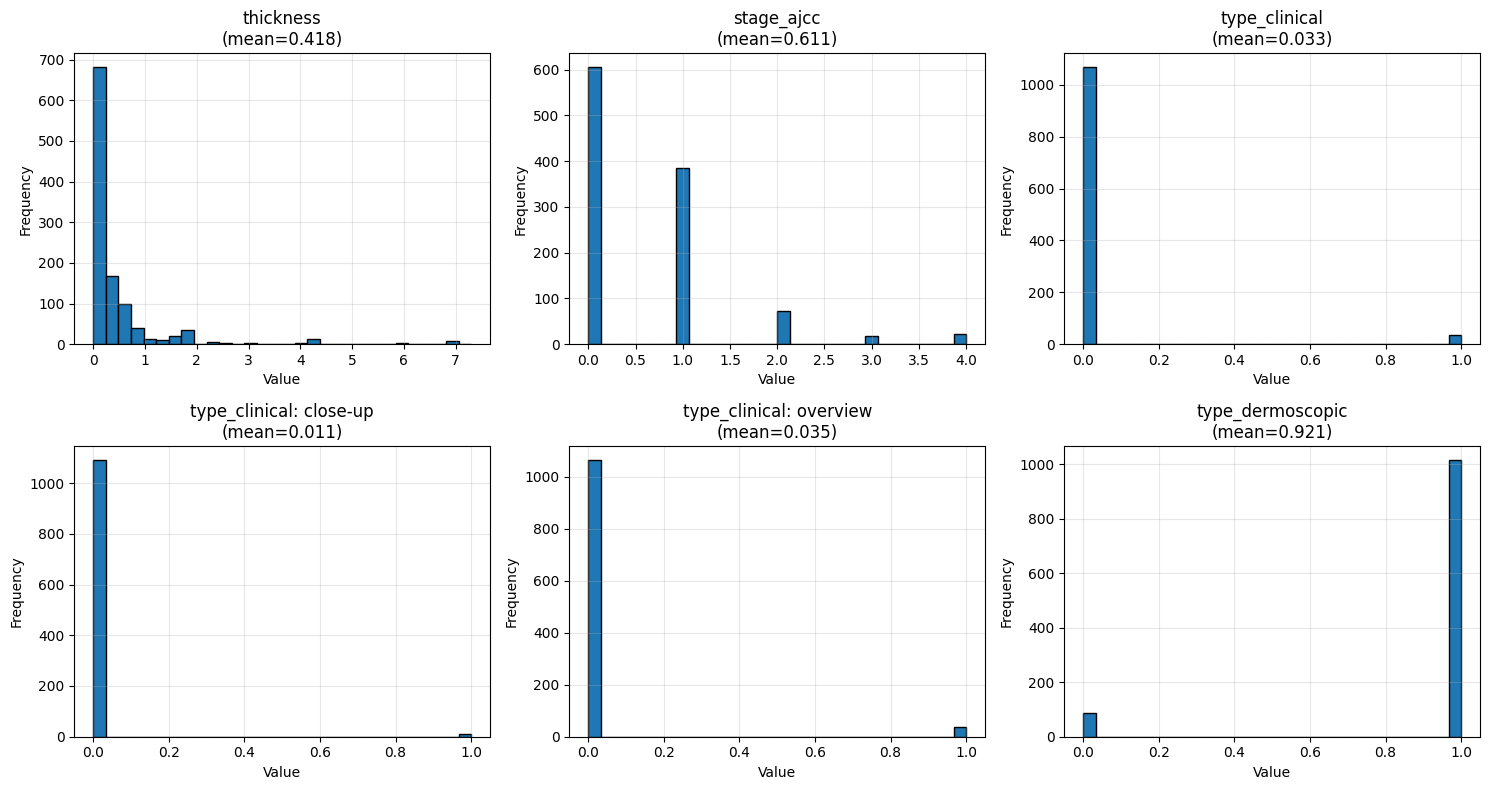


📝 Summary:
   These 6 features will be:
   1. Extracted from dataframe
   2. StandardScaler normalized (fit on train, transform val/test)
   3. Fed to clinical encoder MLP
   4. Fused with image features via cross-attention


In [8]:
# ============================================================================
# SECTION 4: FEATURE COLUMNS IDENTIFICATION
# ============================================================================

print("\n" + "="*80)
print("SECTION 4: IDENTIFYING CLINICAL FEATURE COLUMNS")
print("="*80)

if 'df_loaded' in locals():
    # Simulate what main.py does
    exclude = {"image_path", "image_id", "label", "target", "cathegory", "category", "source"}
    feature_cols = [c for c in df_loaded.columns if c not in exclude]
    
    # Keep only numeric columns
    feature_cols_numeric = [c for c in feature_cols if pd.api.types.is_numeric_dtype(df_loaded[c])]
    
    print(f"\n📊 Feature Column Analysis:")
    print(f"   Total columns: {len(df_loaded.columns)}")
    print(f"   Excluded columns: {sorted(exclude)}")
    print(f"   Candidate features (after exclusion): {len(feature_cols)}")
    print(f"   Final numeric features: {len(feature_cols_numeric)}")
    
    print(f"\n✅ Final feature columns that will be used:")
    for i, col in enumerate(feature_cols_numeric, 1):
        dtype = df_loaded[col].dtype
        non_null = df_loaded[col].notna().sum()
        mean_val = df_loaded[col].mean() if non_null > 0 else np.nan
        std_val = df_loaded[col].std() if non_null > 0 else np.nan
        print(f"   {i:2d}. {col:25s} | dtype: {str(dtype):10s} | "
              f"non-null: {non_null:6,} | mean: {mean_val:8.3f} | std: {std_val:8.3f}")
    
    # Check for missing values
    missing = df_loaded[feature_cols_numeric].isna().sum()
    if missing.sum() > 0:
        print(f"\n⚠️  Missing values in features:")
        for col, miss_count in missing[missing > 0].items():
            print(f"   {col}: {miss_count:,} ({100*miss_count/len(df_loaded):.1f}%)")
    else:
        print(f"\n✓ No missing values in feature columns!")
    
    # Feature distribution visualization
    if len(feature_cols_numeric) > 0:
        n_features = len(feature_cols_numeric)
        n_cols = min(3, n_features)
        n_rows = (n_features + n_cols - 1) // n_cols
        
        if n_features <= 9:  # Only plot if reasonable number
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
            if n_features == 1:
                axes = [axes]
            else:
                axes = axes.flatten()
            
            for idx, col in enumerate(feature_cols_numeric):
                ax = axes[idx]
                df_loaded[col].hist(ax=ax, bins=30, edgecolor='black')
                ax.set_title(f'{col}\n(mean={df_loaded[col].mean():.3f})')
                ax.set_xlabel('Value')
                ax.set_ylabel('Frequency')
                ax.grid(alpha=0.3)
            
            # Hide extra subplots
            for idx in range(len(feature_cols_numeric), len(axes)):
                axes[idx].axis('off')
            
            plt.tight_layout()
            plt.show()
    
    print(f"\n📝 Summary:")
    print(f"   These {len(feature_cols_numeric)} features will be:")
    print(f"   1. Extracted from dataframe")
    print(f"   2. StandardScaler normalized (fit on train, transform val/test)")
    print(f"   3. Fed to clinical encoder MLP")
    print(f"   4. Fused with image features via cross-attention")
else:
    print("⚠️  df_loaded not available. Run Section 3 first.")


SECTION 5: TARGET VARIABLES ANALYSIS

📏 REGRESSION TARGET (thickness):
   Total samples: 1,104
   Non-null: 1,104
   Null: 0

   Statistics:
      Min:    0.000 mm
      Max:    7.300 mm
      Mean:   0.418 mm
      Median: 0.000 mm
      Std:    0.936 mm
      25th percentile: 0.000 mm
      50th percentile: 0.000 mm
      75th percentile: 0.400 mm
      90th percentile: 1.060 mm
      95th percentile: 1.900 mm
      99th percentile: 4.300 mm


AttributeError: 'Series' object has no attribute 'boxplot'

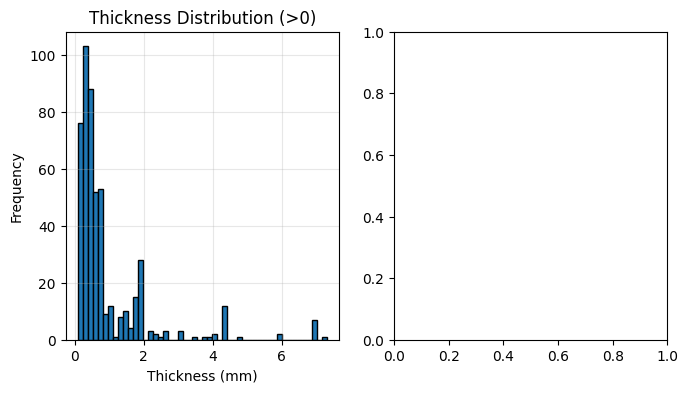

In [9]:
# ============================================================================
# SECTION 5: TARGET VARIABLES ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION 5: TARGET VARIABLES ANALYSIS")
print("="*80)

if 'df_loaded' in locals():
    # Classification target (label)
    if "label" in df_loaded.columns:
        print("\n🎯 CLASSIFICATION TARGET (label):")
        label_series = df_loaded['label']
        print(f"   Total samples: {len(label_series):,}")
        print(f"   Unique values: {sorted(label_series.unique())}")
        print(f"\n   Distribution:")
        label_counts = label_series.value_counts().sort_index()
        for val, count in label_counts.items():
            print(f"      {val}: {count:,} ({100*count/len(label_series):.1f}%)")
        
        # Check class imbalance
        if len(label_counts) == 2:
            ratio = label_counts.iloc[0] / label_counts.iloc[1]
            print(f"\n   Class balance ratio: {ratio:.2f}:1")
            if ratio > 2 or ratio < 0.5:
                print(f"   ⚠️  WARNING: Significant class imbalance!")
        
        # Visualization
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        label_counts.plot(kind='bar', color=['skyblue', 'coral'], edgecolor='black')
        plt.xlabel('Label')
        plt.ylabel('Count')
        plt.title('Classification Label Distribution')
        plt.xticks(rotation=0)
        plt.grid(alpha=0.3, axis='y')
        
        plt.subplot(1, 2, 2)
        plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
                colors=['skyblue', 'coral'], startangle=90)
        plt.title('Class Proportions')
        plt.tight_layout()
        plt.show()
    
    # Regression target (thickness)
    if "thickness" in df_loaded.columns:
        print("\n📏 REGRESSION TARGET (thickness):")
        thickness_series = df_loaded['thickness']
        print(f"   Total samples: {len(thickness_series):,}")
        print(f"   Non-null: {thickness_series.notna().sum():,}")
        print(f"   Null: {thickness_series.isna().sum():,}")
        print(f"\n   Statistics:")
        print(f"      Min:    {thickness_series.min():.3f} mm")
        print(f"      Max:    {thickness_series.max():.3f} mm")
        print(f"      Mean:   {thickness_series.mean():.3f} mm")
        print(f"      Median: {thickness_series.median():.3f} mm")
        print(f"      Std:    {thickness_series.std():.3f} mm")
        
        # Percentiles
        for p in [25, 50, 75, 90, 95, 99]:
            val = thickness_series.quantile(p/100)
            print(f"      {p}th percentile: {val:.3f} mm")
        
        # Visualization
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        thickness_series[thickness_series > 0].hist(bins=50, edgecolor='black')
        plt.xlabel('Thickness (mm)')
        plt.ylabel('Frequency')
        plt.title('Thickness Distribution (>0)')
        plt.grid(alpha=0.3)
        
        plt.subplot(1, 3, 2)
        thickness_series.boxplot()
        plt.ylabel('Thickness (mm)')
        plt.title('Thickness Boxplot')
        plt.grid(alpha=0.3)
        
        plt.subplot(1, 3, 3)
        plt.hist([thickness_series == 0, (thickness_series > 0) & (thickness_series <= 1),
                  (thickness_series > 1) & (thickness_series <= 4), thickness_series > 4],
                 bins=[0, 0.5, 1.5, 4.5, 10], 
                 label=['0 (in-situ)', '0.1-1mm', '1-4mm', '>4mm'],
                 color=['orange', 'green', 'blue', 'red'], edgecolor='black')
        plt.xlabel('Thickness Category')
        plt.ylabel('Count')
        plt.title('Thickness Categories')
        plt.legend()
        plt.grid(alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
    
    # Relationship between targets
    if "label" in df_loaded.columns and "thickness" in df_loaded.columns:
        print("\n🔗 RELATIONSHIP BETWEEN TARGETS:")
        df_cross = pd.crosstab(df_loaded['label'], 
                               pd.cut(df_loaded['thickness'], 
                                     bins=[-0.1, 0.1, 1, 4, 20],
                                     labels=['0mm (in-situ)', '0.1-1mm', '1-4mm', '>4mm']))
        print("\n   Cross-tabulation (Label × Thickness Category):")
        display(df_cross)
        
        # Correlation
        if df_loaded['label'].dtype in [np.int64, np.float64]:
            corr = df_loaded[['label', 'thickness']].corr().iloc[0, 1]
            print(f"\n   Correlation coefficient: {corr:.3f}")

In [10]:
# ============================================================================
# SECTION 6: DATA SPLIT VALIDATION
# ============================================================================

print("\n" + "="*80)
print("SECTION 6: TESTING DATA SPLITS")
print("="*80)

if 'df_loaded' in locals():
    try:
        print("\n📊 Creating train/val/test splits...")
        splits = split_dataset(df_loaded, val_size=0.15, test_size=0.15, random_state=42)
        
        print(f"\n✅ Splits created successfully!")
        print(f"   Train: {len(splits.train):,} samples ({100*len(splits.train)/len(df_loaded):.1f}%)")
        print(f"   Val:   {len(splits.val):,} samples ({100*len(splits.val)/len(df_loaded):.1f}%)")
        print(f"   Test:  {len(splits.test):,} samples ({100*len(splits.test)/len(df_loaded):.1f}%)")
        
        # Check target distribution in splits
        if "label" in df_loaded.columns:
            print(f"\n📊 Label distribution across splits:")
            for split_name, split_df in [("Train", splits.train), 
                                        ("Val", splits.val), 
                                        ("Test", splits.test)]:
                if "label" in split_df.columns:
                    label_dist = split_df['label'].value_counts().sort_index()
                    print(f"\n   {split_name}:")
                    for val, count in label_dist.items():
                        print(f"      Label {val}: {count:,} ({100*count/len(split_df):.1f}%)")
        
        # Check thickness distribution
        if "thickness" in df_loaded.columns:
            print(f"\n📏 Thickness statistics across splits:")
            for split_name, split_df in [("Train", splits.train), 
                                        ("Val", splits.val), 
                                        ("Test", splits.test)]:
                if "thickness" in split_df.columns:
                    thickness_stats = split_df['thickness'].describe()
                    print(f"\n   {split_name}:")
                    print(f"      Mean: {thickness_stats['mean']:.3f} mm")
                    print(f"      Std:  {thickness_stats['std']:.3f} mm")
                    print(f"      Min:  {thickness_stats['min']:.3f} mm")
                    print(f"      Max:  {thickness_stats['max']:.3f} mm")
        
        print(f"\n✓ Split validation complete!")
        
    except Exception as e:
        print(f"\n❌ Error creating splits: {e}")
        import traceback
        traceback.print_exc()
else:
    print("⚠️  df_loaded not available. Run Section 3 first.")


SECTION 6: TESTING DATA SPLITS

📊 Creating train/val/test splits...

✅ Splits created successfully!
   Train: 772 samples (69.9%)
   Val:   166 samples (15.0%)
   Test:  166 samples (15.0%)

📏 Thickness statistics across splits:

   Train:
      Mean: 0.384 mm
      Std:  0.838 mm
      Min:  0.000 mm
      Max:  7.300 mm

   Val:
      Mean: 0.527 mm
      Std:  1.141 mm
      Min:  0.000 mm
      Max:  7.000 mm

   Test:
      Mean: 0.468 mm
      Std:  1.117 mm
      Min:  0.000 mm
      Max:  7.000 mm

✓ Split validation complete!


In [11]:
# ============================================================================
# SECTION 7: PREPROCESSING PIPELINE TEST
# ============================================================================

print("\n" + "="*80)
print("SECTION 7: TESTING PREPROCESSING PIPELINE")
print("="*80)

if 'df_loaded' in locals() and 'splits' in locals():
    # Identify feature columns (same logic as main.py)
    exclude = {"image_path", "image_id", "label", "target", "cathegory", "category", "source"}
    feature_cols = [c for c in splits.train.columns if c not in exclude]
    feature_cols = [c for c in feature_cols if pd.api.types.is_numeric_dtype(splits.train[c])]
    
    print(f"\n📊 Feature columns identified: {len(feature_cols)}")
    print(f"   {feature_cols}")
    
    # Test StandardScaler
    print(f"\n🔧 Testing StandardScaler preprocessing...")
    sp = StructuredPreprocessor(feature_names=feature_cols)
    
    # Fit on train
    train_features = splits.train[feature_cols].to_numpy()
    train_scaled = sp.fit_transform(train_features)
    
    print(f"   Train features shape: {train_features.shape}")
    print(f"   Scaled features shape: {train_scaled.shape}")
    
    # Transform val and test
    val_features = splits.val[feature_cols].to_numpy()
    test_features = splits.test[feature_cols].to_numpy()
    val_scaled = sp.transform(val_features)
    test_scaled = sp.transform(test_features)
    
    print(f"\n   Pre-scaling statistics (train):")
    train_df = pd.DataFrame(train_features, columns=feature_cols)
    print(train_df.describe())
    
    print(f"\n   Post-scaling statistics (train):")
    train_scaled_df = pd.DataFrame(train_scaled, columns=feature_cols)
    print(train_scaled_df.describe())
    
    # Verify mean≈0, std≈1 for train
    print(f"\n   ✓ Verifying normalization (train):")
    for i, col in enumerate(feature_cols):
        mean_val = train_scaled[:, i].mean()
        std_val = train_scaled[:, i].std()
        print(f"      {col:25s} | mean: {mean_val:8.4f} (target: 0.0000) | "
              f"std: {std_val:8.4f} (target: 1.0000)")
    
    print(f"\n✅ Preprocessing pipeline validated!")
else:
    print("⚠️  Required variables not available. Run Sections 3 and 6 first.")


SECTION 7: TESTING PREPROCESSING PIPELINE

📊 Feature columns identified: 6
   ['thickness', 'stage_ajcc', 'type_clinical', 'type_clinical: close-up', 'type_clinical: overview', 'type_dermoscopic']

🔧 Testing StandardScaler preprocessing...
   Train features shape: (772, 6)
   Scaled features shape: (772, 6)

   Pre-scaling statistics (train):
        thickness  stage_ajcc  type_clinical  type_clinical: close-up  \
count  772.000000  772.000000     772.000000               772.000000   
mean     0.384210    0.588083       0.033679                 0.012953   
std      0.838368    0.801272       0.180518                 0.113147   
min      0.000000    0.000000       0.000000                 0.000000   
25%      0.000000    0.000000       0.000000                 0.000000   
50%      0.000000    0.000000       0.000000                 0.000000   
75%      0.400000    1.000000       0.000000                 0.000000   
max      7.300000    4.000000       1.000000                 1.000000 